# Pre-lecture HW 06 - Cayden Wong 2024/11/05

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

Session link for Q1: https://chatgpt.com/share/672a32ef-2e68-8012-b368-486c9ee02929

The theoretical simple linear regression model describes a relationship between a predictor variable $x_i$ and an outcome variable $Y_i$. The theoretical model is defined by the equation $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, where $\beta_0$ is the y-intercept, $\beta_1$ is the slope, and $\epsilon_i$ are normally distributed error terms. Since $Y_i$ is dependant on the normally distributed $\epsilon_i$, then the outcome variable $Y_i$ must also be normally distributed while dependant on the value of the predictor variable $x_i$ 

In [2]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Define parameters
n = 100  # number of data points
beta0 = 2  # intercept
beta1 = 1.5  # slope
sigma = 1  # standard deviation of errors

# Generate predictor variable (x) from a uniform distribution
np.random.seed(42)
x = stats.uniform.rvs(0, 10, size=n)

# Generate error terms from a normal distribution
errors = stats.norm.rvs(0, sigma, size=n)

# Generate outcome variable (y) using the theoretical linear model
y = beta0 + beta1 * x + errors

# Visualization of the data and the true regression line
fig = go.Figure()

# Scatter plot of the data points (x, y)
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))

# Add the true theoretical line (without noise)
x_line = np.array([x.min(), x.max()])
y_line = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Line', line=dict(color='orange', dash='dot')))

# Show the plot
fig.update_layout(title='Simple Linear Regression: True Model vs Simulated Data',
                  xaxis_title='Predictor (x)',
                  yaxis_title='Outcome (y)')
fig.show()


### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

Session link for Q2: https://chatgpt.com/share/672a32ef-2e68-8012-b368-486c9ee02929

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

# Combine x and y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})


In [4]:
# Specify and fit the OLS regression model
model_data_specification = smf.ols("y ~ x", data=df)  # Specifies the linear model y ~ x
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Model summary and parameters
fitted_model.summary()  # Provides a detailed summary of the regression results
fitted_model.summary().tables[1]  # Provides the coefficient table
fitted_model.params  # Provides the estimated intercept and slope
fitted_model.params.values  # Array of the estimated intercept and slope values
fitted_model.rsquared  # Provides the R-squared value of the model

# Create a scatter plot of the data and add the fitted model line
df['Data'] = 'Data'  # Hack to add the data label to the legend
fig = px.scatter(df, x='x', y='y', color='Data', title='y vs. x with Fitted Line')

# Add the fitted regression line from the OLS model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")


# Show the plot
fig.show()

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

Session link for Q3: https://chatgpt.com/share/672a32ef-2e68-8012-b368-486c9ee02929

The dotted orange line is our model population, which we used to generate samples. We defined the parameters for this population. The solid blue line represents a fitted regression model created from our samples generated from our theoretical model. The solid blue line is an estimate for what our population model looks like from our sample.

In [5]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Define parameters
n = 100  # number of data points
beta0 = 2  # intercept
beta1 = 1.5  # slope
sigma = 1  # standard deviation of errors

# Generate predictor variable (x) from a uniform distribution
x = stats.uniform.rvs(0, 10, size=n)

# Generate error terms from a normal distribution
errors = stats.norm.rvs(0, sigma, size=n)
# Generate outcome variable (y) using the theoretical linear model
y = beta0 + beta1 * x + errors

# Visualization of the data and the true regression line
fig = go.Figure()

# Scatter plot of the data points (x, y)
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))

# Add the true theoretical line (without noise)
x_line = np.array([x.min(), x.max()])
y_line = beta0 + beta1 * x_line

# Combine x and y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Specify and fit the OLS regression model
model_data_specification = smf.ols("y ~ x", data=df)  # Specifies the linear model y ~ x
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Model summary and parameters
fitted_model.summary()  # Provides a detailed summary of the regression results
fitted_model.summary().tables[1]  # Provides the coefficient table
fitted_model.params  # Provides the estimated intercept and slope
fitted_model.params.values  # Array of the estimated intercept and slope values
fitted_model.rsquared  # Provides the R-squared value of the model

# Create a scatter plot of the data and add the fitted model line
df['Data'] = 'Data'  # Hack to add the data label to the legend
fig = px.scatter(df, x='x', y='y', color='Data', title='y vs. x with Fitted Line')

# Add the fitted regression line from the OLS model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")


# Adding the theoretical line from Question 1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range  # y = beta0 + beta1 * x

# Add the theoretical line (dotted and orange) to the plot
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Show the updated plot with both the fitted and theoretical lines
fig.show()


##### Interaction summary for Q1-Q3

Here’s a summary of our interaction for your homework on Simple Linear Regression:

1. **Theoretical Model Explanation and Code (Question 1)**:
   - We discussed the components of the Simple Linear Regression (SLR) model, including predictor \( x \), outcome \( y \), slope \( \beta_1 \), intercept \( \beta_0 \), and error term \( \epsilon \). 
   - A Python code snippet demonstrated creating the data using arbitrary values for these parameters, with errors sampled from a normal distribution, then visualizing data points and the theoretical line with Plotly.

2. **Fitted Model Creation and Explanation (Question 2)**:
   - We used `statsmodels.formula.api` to fit a model to the simulated data and explored various outputs:
     - **`fitted_model.summary()`**: Provides a statistical summary.
     - **`fitted_model.params`**: Lists the estimated coefficients (intercept and slope).
     - **`fitted_model.rsquared`**: Shows the R-squared value, indicating model fit quality.
   - Plotly was used to visualize the simulated data points and fitted model line.

3. **Comparison of Theoretical and Fitted Lines (Question 3)**:
   - We added the theoretical line (from Question 1) to the plot with the fitted line (from Question 2) for comparison. 
   - Key Insight: The theoretical line represents the true relationship, while the fitted line is an approximation influenced by random errors in the data. Differences between the two lines highlight the impact of noise on model fitting.

This interaction provided a comprehensive overview of theoretical versus fitted models in SLR, using Python and visualization to illustrate differences. If you need further clarifications, feel free to ask!

### 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

Session link for Q4: https://chatgpt.com/share/672a37b9-2e10-8012-975d-f822e512c9b3

In [6]:
fitted_model.fittedvalues

0     14.008395
1      9.544463
2     10.679135
3      9.389855
4      4.847996
        ...    
95    13.138838
96    10.334611
97    11.211078
98     8.275796
99     5.649925
Length: 100, dtype: float64

In [7]:
fitted_model.params

Intercept    1.865011
x            1.527832
dtype: float64

In [8]:
fitted_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8650,0.189,9.866,0.000,1.490,2.240
x,1.5278,0.031,48.563,0.000,1.465,1.590


Fitted values are calculated using the fitted model. A given predictor value is multiplied by the fitted slope coefficient, then is added to the fitted intercept to produce a fitted value. The values in `fitted_model.fittedvalues` are calculated by passing each predictor variable into the fitted model recording the outcome.

##### Interaction summary for Q4:
Here's a brief summary of our interaction:

You asked about interpreting a question related to Simple Linear Regression in Python, specifically about explaining how `fitted_model.fittedvalues` are derived using model parameters. I clarified that the question requires illustrating how fitted values (predicted values) are calculated using the estimated intercept and slope from the fitted model, contrasting them with theoretical values. I explained that `fitted_model.fittedvalues` provides these predicted values based on the regression equation, allowing you to assess model predictions against actual values.

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

Session link for Q5: https://chatgpt.com/share/672a3b94-c000-8012-99c0-aa18588c8bc4

The line that is chosen is the one that has the minimum sum of squares, that is the sum of the squares of the distance between the datapoint and the line. Squares are used to remove directionality from the distances of far away each point is from the line and punishes further deviations from the line, we want to minimize this value since we want a line that best represents the population which we assume to have normally distributed error terms. Thus, having a model that minimizes its distance from our observed samples would best represent the population.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

1) 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
2) fitted_model.rsquared
3) np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
4) np.corrcoef(Y,x)[0,1]**2

Session link for Q6: https://chatgpt.com/share/672a8a1c-4bc0-8012-961c-05eb8f4c713a

The first expression is derived from the definition of variation explained by the model. The variation for each output from the mean is defined as
$$
\begin{aligned}
ST &= y_i - \bar y \\
&= y_i - \hat{y} + \hat{y} - \bar y \\ 
&= (y_i - \hat y) + (\hat y - \bar y) \\
SST &= (y_i - \hat y)^2 + 2(y_i - \hat y)(\hat y - \bar y) + (\hat y - \bar y)^2 \\
\end{aligned}
$$
Since the regression model minimizes the center cross product to zero, we can represent our sum of total variance across all terms as the sum of squared residuals (SSR) plus the sum of squared errors (SSE).
$$
SST = SSR + SSE
$$ 
We can rearrange the equation so solve for the proportion of total variance explained by the model $$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$ which matches the first expression.

##### Interaction summary for Q6
In this conversation, we explored the concepts and derivation of the \( R^2 \) (coefficient of determination) formula in simple linear regression. Here’s a summary:

1. **Purpose of SST**: We began by discussing why the Total Sum of Squares (SST) is necessary in regression analysis. SST quantifies the total variation in the dependent variable \( y \), serving as a baseline for comparison against the model’s explained and unexplained variability.

2. **Derivation of \( \text{SST} = \text{SSR} + \text{SSE} \)**: We walked through the decomposition of SST into SSR (Sum of Squares due to Regression) and SSE (Sum of Squared Errors). This identity is crucial because it partitions the variability in \( y \) into the part explained by the model (SSR) and the residual or unexplained part (SSE).

3. **Steps for Squaring Both Sides**: We carefully broke down each term by squaring both sides of the equation for \( y_i - \bar{y} = (y_i - \hat{y}_i) + (\hat{y}_i - \bar{y}) \). We saw how squaring led to three components, including a cross-product term that ultimately sums to zero due to the least squares property.

4. **Why the Cross-Product Term Sums to Zero**: We examined the least squares property, which implies that the residuals \( (y_i - \hat{y}_i) \) are uncorrelated with the fitted values \( \hat{y}_i \). Mathematically, this property is represented by \( \sum (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = 0 \), enabling the decomposition \( \text{SST} = \text{SSR} + \text{SSE} \).

5. **Visual and Mathematical Explanation of Least Squares**: We explained that the least squares method minimizes the residual sum of squares (RSS), ensuring that the fitted line is the closest fit to the data points. We used an example to illustrate how residuals are minimized and why they have zero correlation with \( x \), confirming that the regression line is optimally positioned to capture the linear relationship.

Through these steps, we clarified key concepts in the derivation of \( R^2 \), including the purpose of SST, the partition of variability, and the essential least squares property that ensures a minimum sum of squared residuals in the model.

### 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

In [9]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

When doing simple linear regression, we assume that the model can reasonably be represented by a linear form. For this to be true, the error terms must be normally distributed and remain homoscedastic. In the plot above, we can observer that the residuals fail both of these assumptions. The plot to the right shows the residuals instead follow a right skewed distribution. The plot to the left shows that the size of the residual does indeed change as a function of x (starts larger, grows smaller then larger then smaller, then back to large).

# "Week of Nov04" HW - Cayden Wong 2024/11/06
**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here

In [10]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

$H_0: \beta_1 = 0$, there is no correlation between waiting time and duration. 

In [11]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.8740,0.160,-11.702,0.000,-2.189,-1.559
waiting,0.0756,0.002,34.089,0.000,0.071,0.080


Since $p \leq 0.001$, there is very strong evidence against then null hypothesis. 

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf

times = [62, 64, 66]
for short_wait_limit in times:
    short_wait = old_faithful.waiting < short_wait_limit

    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                    title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                    trendline='ols')

    fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


When the wait time is $< 62$, there is no evidence against the null hypothesis.
When the wait time is $< 64$, there is moderate evidence against the null hypothesis.
When the wait time is $< 66$, there is very strong evidence against the null hypothesis.

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:,


In [13]:
import plotly.express as px
import numpy as np

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print(original_model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


- 1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;

In [14]:
sample_size = long_wait.sum()
number_of_bootstrapped_samples = 10000
bootstrapped_beta_1 = np.zeros(number_of_bootstrapped_samples)
for i in range(number_of_bootstrapped_samples):
    sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    fitted_bootstrapped_model = smf.ols('duration ~ waiting', data=sample)
    bootstrapped_beta_1[i] = fitted_bootstrapped_model.fit().params['waiting']

fig = px.histogram(bootstrapped_beta_1)
fig.show()

- 2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,

In [15]:
sample_size = long_wait.sum()
observed = original_model.params['waiting']
number_of_simulations = 10000
number_as_or_more_extreme = 0
alpha_significance = 0.05
observed_simulations = np.zeros(number_of_simulations)
for i in range(number_of_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    observed_simulations[i] = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit().params['waiting']
    if abs(observed_simulations[i]) >= abs(observed): # ABS for two sided
        number_as_or_more_extreme += 1

print(f"Number as or more extreme than observed: {number_as_or_more_extreme}\np-value: {number_as_or_more_extreme / number_of_simulations :.5f}")
print(f"{number_as_or_more_extreme / number_of_simulations} <= {alpha_significance}, we can reject the null hypothesis")
fig = px.histogram(observed_simulations)
fig.show()

Number as or more extreme than observed: 364
p-value: 0.03640
0.0364 <= 0.05, we can reject the null hypothesis


- 3. report if $0$ is contained within a 95\\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?

In [16]:
print("Bootstrapped Confidence Interval: ", np.quantile(bootstrapped_beta_1, [0.025, 0.975]))
print("Simulated P-Value: ", number_as_or_more_extreme / number_of_simulations)
print(original_model.summary())

Bootstrapped Confidence Interval:  [0.0005511  0.02334892]
Simulated P-Value:  0.0364
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.372
Date:                Thu, 07 Nov 2024   Prob (F-statistic):             0.0381
Time:                        09:42:26   Log-Likelihood:                -68.319
No. Observations:                 160   AIC:                             140.6
Df Residuals:                     158   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

### 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length $$Y_i = \beta_{intercept} + 1_{["long"]}(k_i)\beta_{contrast} + \epsilon_i \quad \text{where} \quad \epsilon_i ~ \mathcal{N}(0, \sigma)$$ where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

1) `smf.ols('duration ~ waiting', data=old_faithful)`
2) `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3) `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a null hypothesis of "no difference between groups "on average" for the new indicator variable based model

Session link for Q11 + Q12: NOT SUPPORTED VIEW SUMMARY


In [17]:
from IPython.display import display
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')
model1 = smf.ols('duration ~ waiting', data=old_faithful).fit()
model2 = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
model3 = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
model4 = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

display(model4.summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Get predicted means for each category
short_mean = model4.predict({'kind': ['short']}).mean()
long_mean = model4.predict({'kind': ['long']}).mean()

# Add OLS lines representing the mean duration for each category
fig.add_trace(go.Scatter(x=['short', 'long'], y=[short_mean, long_mean],
                         mode='lines+markers', name='OLS Mean Line',
                         line=dict(color='red', dash='dash'),
                         marker=dict(size=8, color='red')))

# Show the plot
fig.show()  # For GitHub and MarkUs compatibility

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

Session link for Q11 + Q12: NOT SUPPORTED VIEW SUMMARY

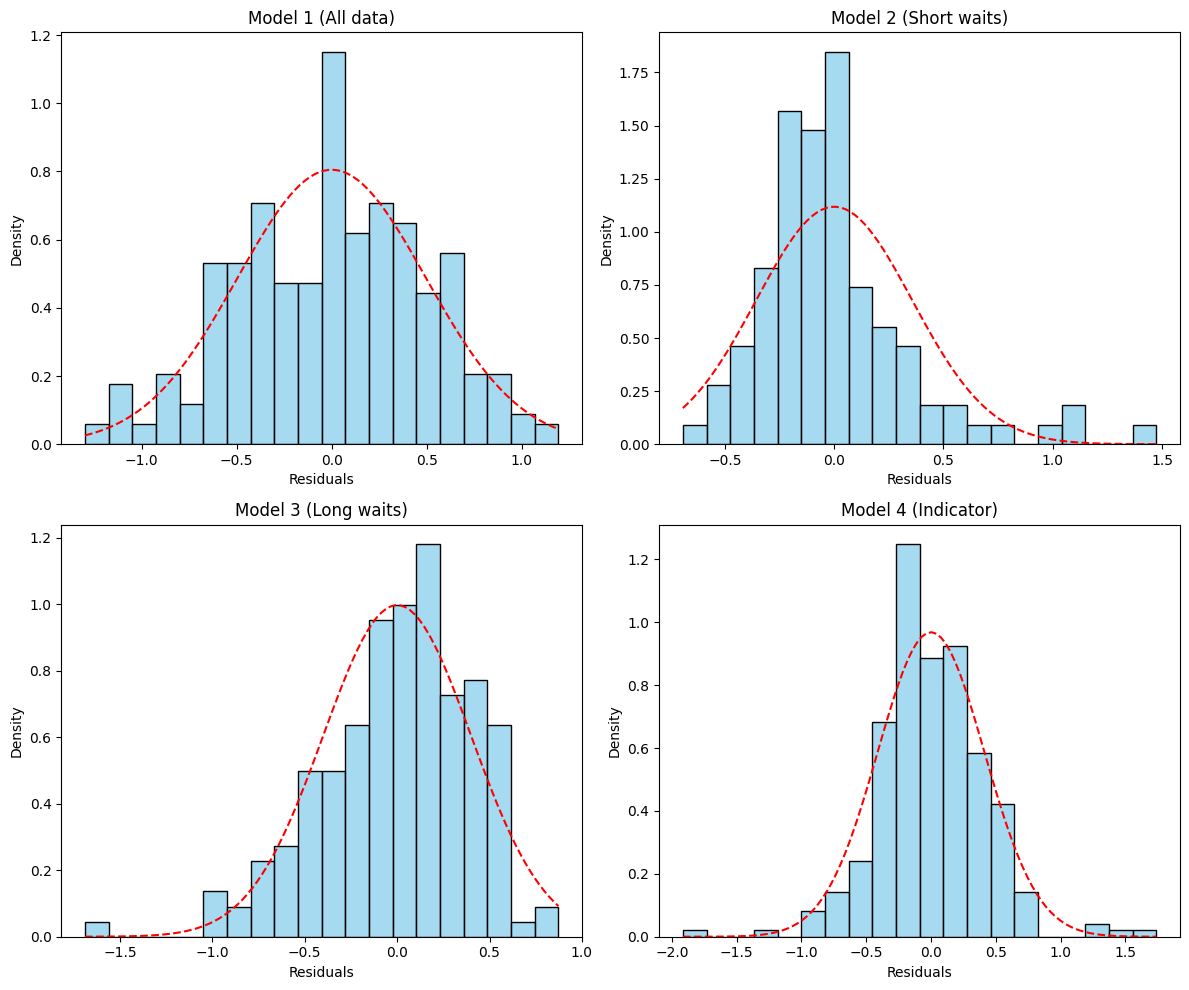

In [18]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Define models
model1 = smf.ols('duration ~ waiting', data=old_faithful).fit()
model2 = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] < 68]).fit()
model3 = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] >= 68]).fit()
model4 = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Collect residuals
residuals = [model1.resid, model2.resid, model3.resid, model4.resid]
titles = ["Model 1 (All data)", "Model 2 (Short waits)", "Model 3 (Long waits)", "Model 4 (Indicator)"]

# Create 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axs.ravel()):
    # Histogram of residuals
    sns.histplot(residuals[i], kde=False, bins=20, color='skyblue', ax=ax, stat="density")
    
    # Calculate mean and standard deviation
    mean_resid = residuals[i].mean()
    std_resid = residuals[i].std()
    
    # Overlay normal distribution
    x_vals = np.linspace(residuals[i].min(), residuals[i].max(), 100)
    normal_dist = norm.pdf(x_vals, mean_resid, std_resid)
    ax.plot(x_vals, normal_dist, color='red', linestyle='--')
    
    # Titles and labels
    ax.set_title(titles[i])
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()


In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

For Model 0: Mean = 1.8286026287943753e-15 std = 0.49559601343629445
For Model 1: Mean = -1.1102230246251565e-16 std = 0.35681346405799147
For Model 2: Mean = 1.4742729001417777e-15 std = 0.40006391328853463
For Model 3: Mean = -8.302182470910178e-16 std = 0.41189877698607275


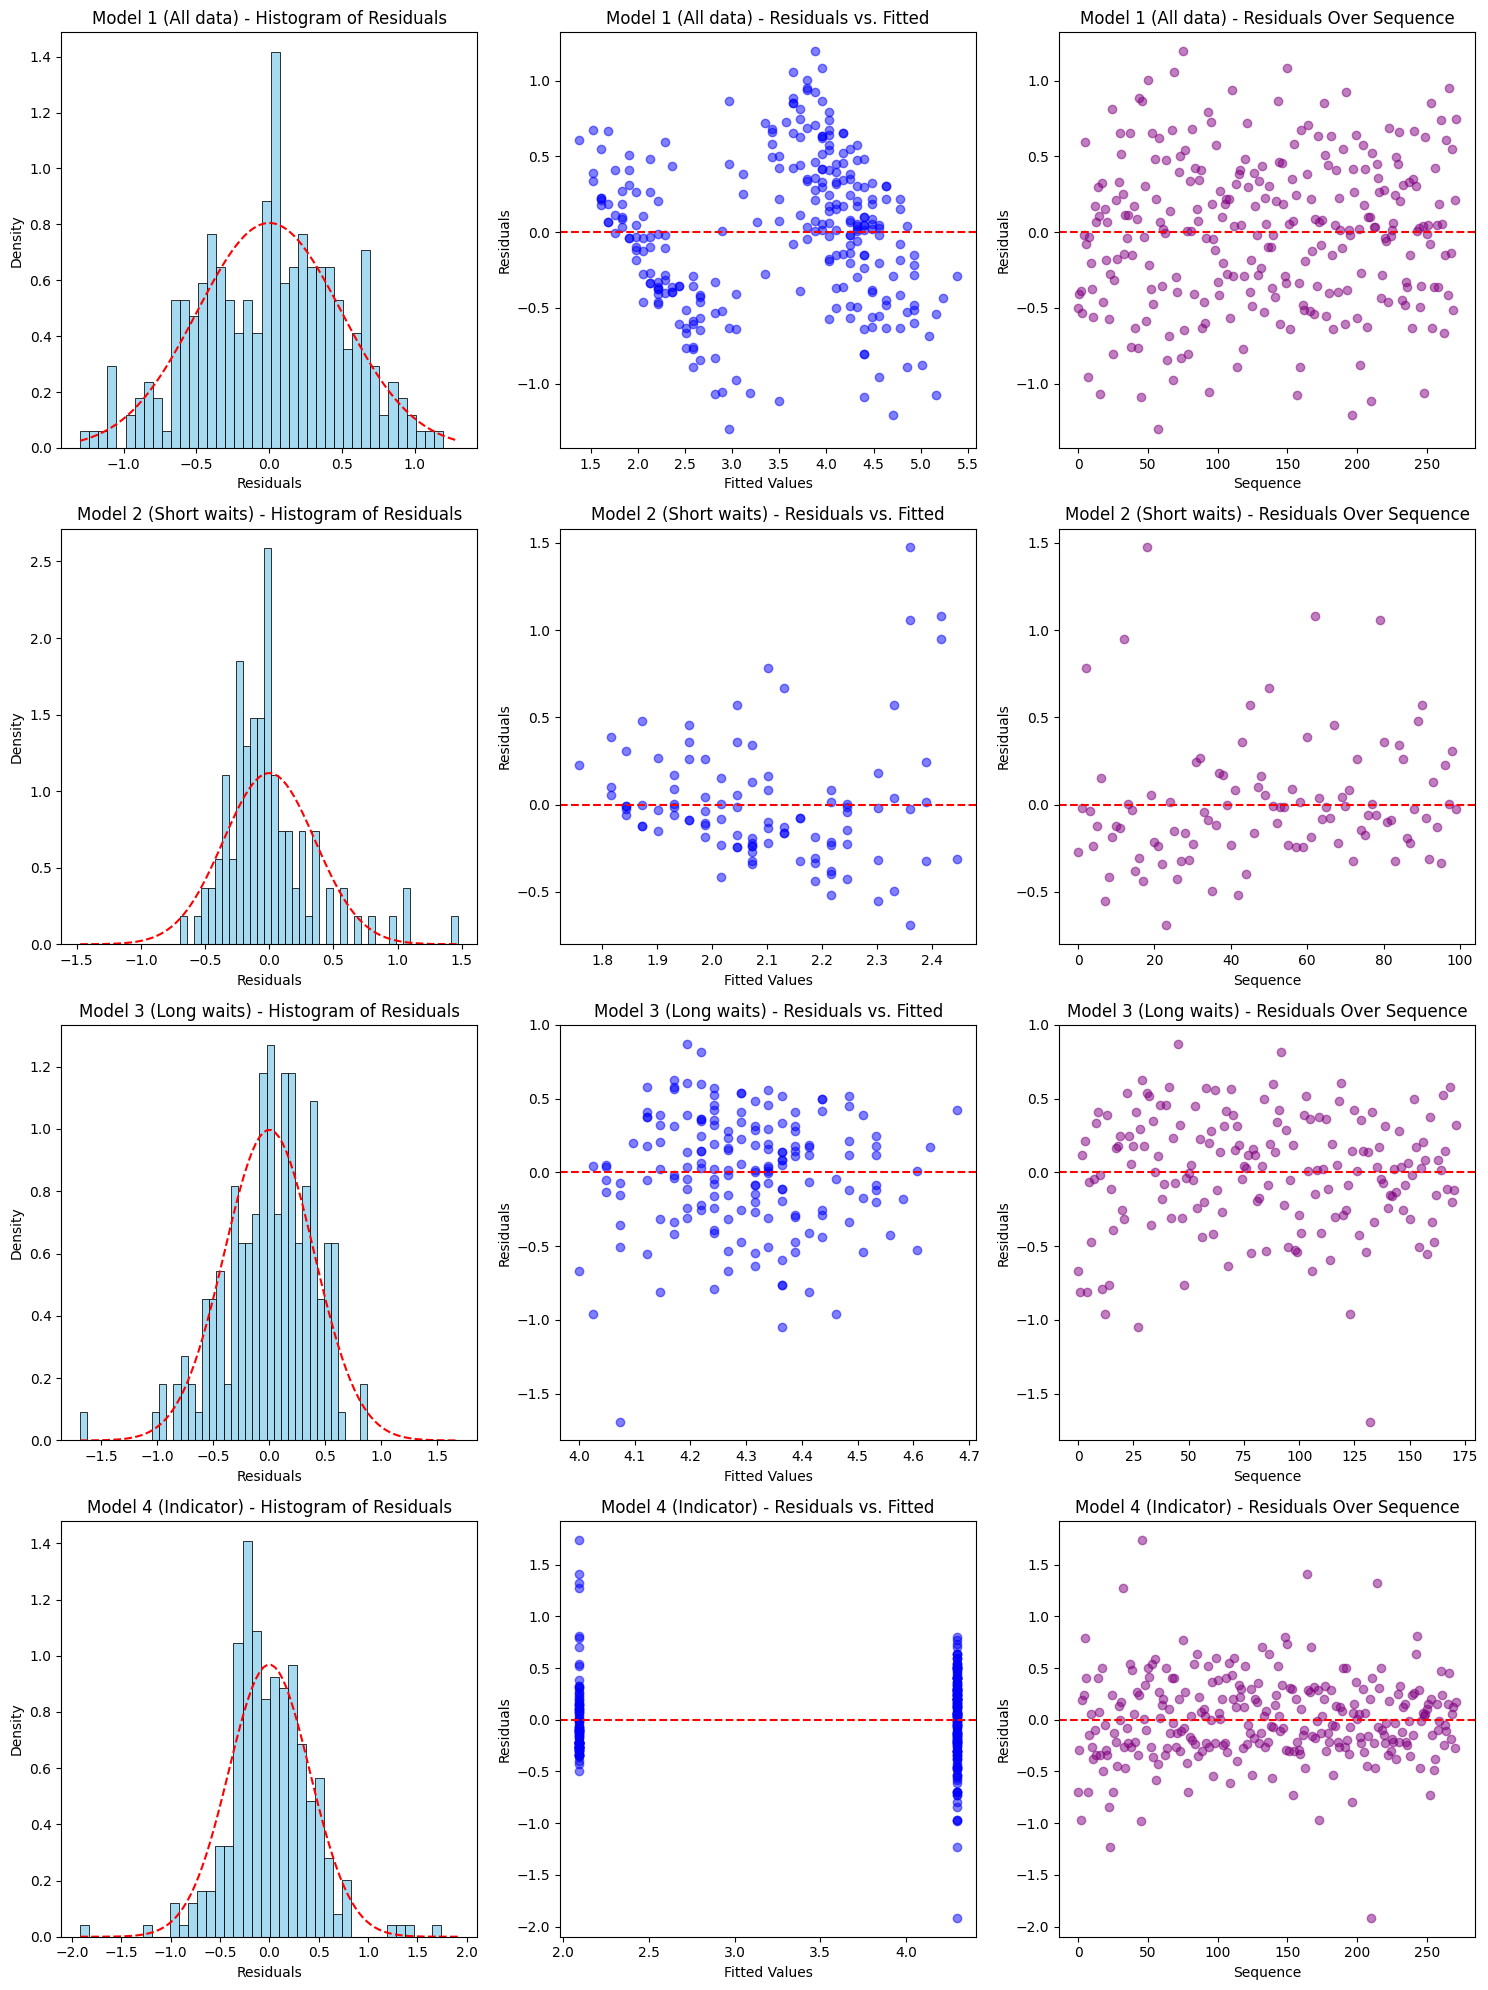

In [26]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define 'kind' variable based on wait time threshold
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit models
model1 = smf.ols('duration ~ waiting', data=old_faithful).fit()
model2 = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'short']).fit()
model3 = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'long']).fit()
model4 = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# List of models and titles
models = [model1, model2, model3, model4]
titles = ["Model 1 (All data)", "Model 2 (Short waits)", "Model 3 (Long waits)", "Model 4 (Indicator)"]

# Create a 4x3 figure for the plots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, model in enumerate(models):
    # Get residuals and fitted values
    residuals = model.resid
    fitted = model.fittedvalues
    
    # Calculate mean and standard deviation for overlay
    mean_resid = residuals.mean()
    std_resid = residuals.std()

    print(f"For Model {i}: Mean = {mean_resid} std = {std_resid}")
    
    # Plot histogram of residuals with normal distribution overlay
    sns.histplot(residuals, kde=False, bins=40, color='skyblue', ax=axs[i, 0], stat="density")
    extreme = max(abs(residuals.min()), abs(residuals.max()))
    x_vals = np.linspace(-extreme, extreme, 100)
    normal_dist = norm.pdf(x_vals, mean_resid, std_resid)
    axs[i, 0].plot(x_vals, normal_dist, color='red', linestyle='--')
    axs[i, 0].set_title(f"{titles[i]} - Histogram of Residuals")
    axs[i, 0].set_xlabel("Residuals")
    axs[i, 0].set_ylabel("Density")
    
    # Plot residuals vs. fitted values to check for homoscedasticity
    axs[i, 1].scatter(fitted, residuals, alpha=0.5, color='blue')
    axs[i, 1].axhline(y=0, color='red', linestyle='--')
    axs[i, 1].set_title(f"{titles[i]} - Residuals vs. Fitted")
    axs[i, 1].set_xlabel("Fitted Values")
    axs[i, 1].set_ylabel("Residuals")
    
    # Plot residuals over sequence to check for independence
    sequence = np.arange(len(residuals))  # Use index as a sequence
    axs[i, 2].scatter(sequence, residuals, alpha=0.5, color='purple')
    axs[i, 2].axhline(y=0, color='red', linestyle='--')
    axs[i, 2].set_title(f"{titles[i]} - Residuals Over Sequence")
    axs[i, 2].set_xlabel("Sequence")
    axs[i, 2].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


The first model satisfies normality. The residuals are normally distributed and symmetrical around x=0. The second and fourth models are right skewed, where most of the data sits to the left of x=0. The third graph is left skewed where most of the data sits to the right of x=0.

### Interaction Summary for Q11 + Q12
The user started by working on statistical tests in Python using pandas and numpy, specifically a permutation test and a bootstrap confidence interval for analyzing differences in mean "duration" values based on "kind" groups within the Old Faithful dataset. 

Initially, the user calculated an observed mean difference, then generated a distribution of mean differences by shuffling the "kind" labels 10,000 times to simulate a permutation test, ultimately calculating a p-value. They then implemented a bootstrap test, sampling with replacement within each "kind" group, calculating mean differences for each resample to generate a 95% confidence interval for the mean difference.

They encountered a `DeprecationWarning` related to the `groupby().apply()` method in pandas, indicating that grouping columns would be excluded from the operation in future versions. I provided guidance to resolve this warning by suggesting `include_group_keys=False` and reassigning the "kind" column in the bootstrap samples to ensure the code would work without the warning. After resolving an additional `KeyError`, the code was updated to work as expected.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.
### (A) Do a permuation test 
### $H_0: \mu_{short}= \mu_{long}$ no difference in duration between short and long groups by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

Session Link for Q13: NOT AVAILABLE CHECK SUMMARY

In [41]:
import numpy as np
import pandas as pd

# Define the observed mean difference
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

print(f"Observed Mean Difference: {observed_mean_diff}")

# Permutation Test
n_permutations = 10000
permutation_diffs = []

for _ in range(n_permutations):
    # Shuffle 'kind' labels
    old_faithful['kind_shuffled'] = old_faithful['kind'].sample(n=len(old_faithful), replace=False).values
    # Calculate mean difference for shuffled data
    mean_diff = old_faithful.groupby('kind_shuffled')['duration'].mean().diff().values[1]
    permutation_diffs.append(mean_diff)

# Calculate p-value
p_value = (np.abs(permutation_diffs) >= np.abs(observed_mean_diff)).mean()

print("Permutation Test p-value:", p_value)

# Bootstrap Confidence Interval
n_bootstrap = 10000
bootstrap_diffs = []
for _ in range(n_bootstrap):
    # Bootstrap sample within each group, excluding 'kind' column from the operation
    bootstrap_sample = \
        old_faithful.groupby('kind')[['kind', 'duration']].sample(frac=1, replace=True)
    # Re-merge the 'kind' column for grouping and calculation
    mean_diff = bootstrap_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrap_diffs.append(mean_diff)

# Calculate 95% CI for bootstrap
confidence_interval = np.quantile(bootstrap_diffs, [0.025, 0.975])

print("Bootstrap 95% Confidence Interval:", confidence_interval)


Observed Mean Difference: 2.20360023255814
Permutation Test p-value: 0.0
Bootstrap 95% Confidence Interval: [2.10165981 2.30169087]


In the first simulation, we shuffle the groups "short" and "long" labels. Then we split the shuffled groups into their respective categories and calculate and store the mean difference between the two groups. Then we count how many of these are as or more extreme than our mean difference to calculate the p-value. In the second simulation, we bootstrap within each category, resampling each group from itself. Then we calculate and store the mean differences between the two groups. Last we find the 95% confidence interval and check whether 0 lies within the interval or not.

With the indicator model, we are using simple linear regression to determine whether there is correlation between the indicator variable (ie duration is long/short) and the duration. With the methods above, we aren't determining if there is correlation, but instead determining whether there is evidence against the hypothesis that the two groups are not different (mean difference between groups is 0).

### Interaction summary for Q13
After introducing question 13, the user worked on implementing a permutation test and a bootstrap confidence interval to analyze the effect of the "kind" groups on the "duration" variable in the Old Faithful dataset. They aimed to calculate an observed mean difference between the groups and assess its significance using permutation resampling, followed by a bootstrap approach to estimate the 95% confidence interval for the mean difference.

During the implementation, the user encountered a `DeprecationWarning` in pandas due to changes in `groupby().apply()` behavior, which would exclude grouping columns by default in future versions. They also encountered a `KeyError` related to accessing the "kind" column in their bootstrap calculations. I provided updated code to handle these issues, including setting `group_keys=False` and explicitly selecting columns after grouping. These adjustments allowed the permutation and bootstrap tests to run without errors, yielding a p-value for the permutation test and a confidence interval for the bootstrap test.

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yep